In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL 
from PIL import Image
from collections import Counter

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab/agro/data/agro_clean.csv')
df2

,영화 제목,썸네일,유튜브 제목,어그로표현 있음,내용,자극,의문,THUMB,내용있는어그로,video_id,자극+의문,char
0,"100인,인간을말하다",https://i.ytimg.com/vi/1FhZxcKYmE0/hqdefault.jpg,남녀 중 우월한 성별을 통계학적으로 증명하는 천조국 예능 ㄷ,1,0,1,0,1,0,1FhZxcKYmE0,1,9
1,101달마시안,https://i.ytimg.com/vi/ntplV87tOMw/hqdefault.jpg,천재견의 새끼들을 건들면 벌어지는 일,1,1,1,1,0,1,ntplV87tOMw,2,5
2,10분,https://i.ytimg.com/vi/P_Zc-MtVJjM/hqdefault.jpg,계약직으로 회사에 들어가면 벌어지는 일,1,1,0,1,1,1,P_Zc-MtVJjM,1,6
3,10분,https://i.ytimg.com/vi/dXP0DuNCyFI/hqdefault.jpg,안녕하시오! 제가 바로 헬조선의 꼰대 개저씨올시다!,1,1,1,0,0,1,dXP0DuNCyFI,1,6
4,127시간,https://i.ytimg.com/vi/ZwfD2R3XoIk/hqdefault.jpg,절대 중국산 칼을 사면 안되는 이유,1,0,1,1,0,0,ZwfD2R3XoIk,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1876,회사원,https://i.ytimg.com/vi/2PJxWeB0-7Y/hqdefault.jpg,겁도없이 까부는 여자 후배를 참교육 시켜버리는 살벌한 회사원,1,0,1,0,1,0,2PJxWeB0-7Y,1,10
1877,효자동이발사,https://i.ytimg.com/vi/7VdbgvERxMw/hqdefault.jpg,지금 개봉했으면 난리났을 레전드 한국영화,1,0,1,0,1,0,7VdbgvERxMw,1,6
1878,후궁,https://i.ytimg.com/vi/W2lOQOR9JQ4/hqdefault.jpg,기생충의 그녀가 형수님이 되면 얼마나 무서운지 보여주는 영화,1,0,1,0,1,0,W2lOQOR9JQ4,1,10
1879,히든피겨스,https://i.ytimg.com/vi/xk9ZxKEEpng/hqdefault.jpg,천재 흑인이 백인 엘리트들 참교육하는 영화,1,1,1,0,0,1,xk9ZxKEEpng,1,7


In [ ]:
ids = list(np.array(df2['video_id']))
labels = list(np.array(df2['THUMB']))
print(sum(labels))

1366


In [ ]:
duplicates = df2.video_id.value_counts()
print(duplicates[duplicates > 1])

Series([], Name: video_id, dtype: int64)


In [ ]:
duplicates = df2['유튜브 제목'].value_counts()
dup = duplicates[duplicates > 1]
print(dup)

Series([], Name: 유튜브 제목, dtype: int64)


#Data 가져오기

In [ ]:
np_imgs = np.load('/content/drive/MyDrive/Colab/agro/data/np_images.npy')

# Check Data

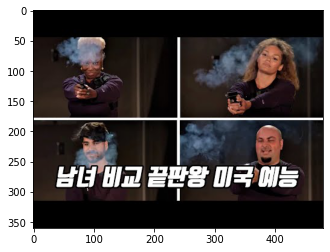

In [ ]:
jpg = Image.fromarray(np_imgs[0])
plt.imshow(jpg)
plt.show()

#데이터 Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np_imgs, labels, test_size=0.2, random_state=42, shuffle=False)
print("training shape: ",x_train.shape, len(y_train))
print("testing shape: ",x_test.shape, len(y_test))
print(y_train)

training shape:  (1504, 360, 480, 3) 1504
testing shape:  (377, 360, 480, 3) 377
[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 

#y 데이터 원핫인코딩

In [ ]:
# y_train = to_categorical(y_train, 2) # One-hot 인코딩을 해주는 함수
# y_test = to_categorical(y_test, 2)
# print('y', y_train.shape)
# print('x', x_train.shape)

# # vectorized labels
# y_train = np.asarray(y_train).astype('float32').reshape((-1,2))
# y_test = np.asarray(y_test).astype('float32').reshape((-1,2))

y (1504, 2)
x (1504, 360, 480, 3)


In [ ]:
x_train = np.reshape(x_train,(1504, 360*480*3))
print(x_train.shape)

In [ ]:
print(x_train.shape)
print(len(y_train))

#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

x_train = x_train.reshape(1504, 360 * 480 * 3)
print(x_train.shape)

SMOTE = SMOTE()

# fit and apply the transform
x_train, y_train = SMOTE.fit_resample(x_train, y_train)

print("After oversampling: ",len(y_train))
print("After oversampling: ",len(x_train))
print(y_train)

# summarize class distribution after SMOTE
print("After oversampling: ",Counter(y_train))
print(y_train)

(1504, 518400)
After oversampling:  2162
After oversampling:  2162
[1 0 1 ... 0 0 0]
After oversampling:  Counter({1: 1081, 0: 1081})
[1 0 1 ... 0 0 0]


In [ ]:
#original x_train : (1504, 360, 480, 3)
#turn back to original shape
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
x_train.shape

(2162, 518400)

In [ ]:
x_train = np.reshape(x_train,(2162,360*480*3))
x_train.shape

(2162, 360, 480, 3)

In [ ]:
# np.save('/content/drive/MyDrive/Colab/agro/data/np_images_x_SMOTE', x_train)
# np.save('/content/drive/MyDrive/Colab/agro/data/np_images_y_SMOTE', y_train)
# print('success')

success


In [ ]:
# x_train_SMOTE = np.load('/content/drive/MyDrive/Colab/agro/data/np_images_x_SMOTE.npy')
# y_train_SMOTE = np.load('/content/drive/MyDrive/Colab/agro/data/np_images_y_SMOTE.npy')

#CNN Model

#Keras CV

In [ ]:
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation="softmax"))

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 356, 476, 32)      2432      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 352, 472, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 176, 236, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 176, 236, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 174, 234, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 172, 232, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 86, 116, 64)      

In [ ]:
history = model.fit(x_train, y_train, epochs=3,callbacks=[es, mc], batch_size=30, validation_split=0.1)

Epoch 1/3


In [ ]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test, batch_size=30, verbose=1)
report = classification_report(y_test, y_pred.round(), digits=4)
print(report)

In [ ]:
agro/non-agro
              precision    recall  f1-score   support

           0     0.5625    0.7826    0.6545        92
           1     0.9197    0.8035    0.8577       285

   micro avg     0.7984    0.7984    0.7984       377
   macro avg     0.7411    0.7931    0.7561       377
weighted avg     0.8325    0.7984    0.8081       377
 samples avg     0.7984    0.7984    0.7984       377

In [ ]:
agro/non-agro + SMOTE
              precision    recall  f1-score   support

           0     0.5625    0.7826    0.6545        92
           1     0.9197    0.8035    0.8577       285

   micro avg     0.7984    0.7984    0.7984       377
   macro avg     0.7411    0.7931    0.7561       377
weighted avg     0.8325    0.7984    0.8081       377
 samples avg     0.7984    0.7984    0.7984       377